# Importing Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import missingno as msno
import plotly.graph_objects as go

from datetime import datetime

# Styles and Settings

In [2]:
%matplotlib inline
sns.set(style='darkgrid')
mpl.rcParams['figure.figsize'] = (16,9)
pd.set_option('display.max_rows', 500)

# Imports from the previous notebook

In [3]:
country_list = ['India', 'Germany', 'Spain']

In [4]:
df_raw = pd.read_csv('../data/raw/owid-covid-data.csv')

In [5]:
df_raw.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [6]:
df_raw.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [7]:
data_trivial = df_raw[['date', 'location','total_cases', 'population', 'people_fully_vaccinated', 'stringency_index']]

In [8]:
data_trivial = data_trivial.rename(columns={'location':'country', 'total_cases':'infected', 'people_fully_vaccinated':'vaccinated'})

In [9]:
data_trivial.head()

,date,country,infected,population,vaccinated,stringency_index
0,2020-02-24,Afghanistan,5.0,39835428.0,NaN,8.33
1,2020-02-25,Afghanistan,5.0,39835428.0,NaN,8.33
2,2020-02-26,Afghanistan,5.0,39835428.0,NaN,8.33
3,2020-02-27,Afghanistan,5.0,39835428.0,NaN,8.33
4,2020-02-28,Afghanistan,5.0,39835428.0,NaN,8.33


# Converting date to correct data-type

In [10]:
date_idx = [datetime.strptime(each, '%Y-%m-%d') for each in data_trivial.date]
data_trivial['date'] = date_idx

In [11]:
df_processed = pd.DataFrame(data_trivial['date'])

In [12]:
df_processed = pd.DataFrame(df_processed['date'].unique())

In [13]:
df_processed.rename(columns={0:'date'}, inplace=True)

In [14]:
df_processed.sort_values(by='date', inplace=True)

In [15]:
df_processed.set_index(['date'], inplace=True)

In [16]:
data_trivial.set_index(['date'], inplace=True)

In [17]:
for each in country_list:
    df_processed[each+'_infected'] = pd.DataFrame(data_trivial[data_trivial['country'] == each]['infected'])
    df_processed[each+'_population'] = pd.DataFrame(data_trivial[data_trivial['country'] == each]['population'])
    df_processed[each+'_stringency_index'] = pd.DataFrame(data_trivial[data_trivial['country'] == each]['stringency_index'])

In [18]:
df_processed.head()

,India_infected,India_population,India_stringency_index,Germany_infected,Germany_population,Germany_stringency_index,Spain_infected,Spain_population,Spain_stringency_index
date,,,,,,,,,
2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df_population = df_processed.fillna(0)

In [20]:
country_population_list=np.zeros(len(country_list))
for pos, each in enumerate(country_list):
    country_population_list[pos] = max(df_population[each+'_population'])

In [21]:
#country_population_list

# Fitting the parameters of SIR model for each country

### Fitting the parameters of SIR model for Germany

In [22]:
from scipy import optimize
from scipy import integrate

In [23]:
ydata_Germany = np.array(df_processed.Germany_infected[60:])
ydata_Germany = ydata_Germany.astype(int)
t_Germany=np.arange(len(ydata_Germany))

In [24]:
# Parameters

#N0 = country_population_list[1] # Population size
N0 = 1000000
beta = 0.4
gamma = 0.1  # 1(gamma) Person can infect 4(beta) people

I0 = ydata_Germany[0]   # Initial infected size
#S0 = N0-I0  # Population prone to infection
S0 = N0-I0
R0 = 0  # Initial recovered size

In [25]:
I0

117

In [26]:
def SIR_model(SIR, t, beta, gamma):
    ''' Simple SIR model
        S: susceptible population
        I: infected people
        R: recovered people
        beta:
        
        overall condition is that the sum of changes (differences) sum up to 0
        dS+dI+dR=0
        S+I+R = N (constant size of population)
    '''
    
    S,I,R = SIR
    dS_dt = -beta*S*I/N0
    dI_dt = beta*S*I/N0-gamma*I
    dR_dt = gamma*I
    return ([dS_dt, dI_dt, dR_dt])

In [27]:
def fit_odeint(x, beta, gamma):
    return integrate.odeint(SIR_model, (S0, I0, R0), t_Germany, args=(beta, gamma))[:,1] # we only would like to get dI

In [28]:
popt=[0.4, 0.1]
fit_odeint(t_Germany, *popt)

array([ 1.17000000e+02,  1.57924452e+02,  2.13158100e+02,  2.87699684e+02,
        3.88290525e+02,  5.24018997e+02,  7.07132193e+02,  9.54123799e+02,
        1.28718846e+03,  1.73615937e+03,  2.34107745e+03,  3.15557574e+03,
        4.25129737e+03,  5.72358968e+03,  7.69871064e+03,  1.03427094e+04,
        1.38719351e+04,  1.85646812e+04,  2.47726292e+04,  3.29293181e+04,
        4.35506614e+04,  5.72195925e+04,  7.45438971e+04,  9.60750182e+04,
        1.22179645e+05,  1.52869804e+05,  1.87623187e+05,  2.25256932e+05,
        2.63934499e+05,  3.01360038e+05,  3.35140610e+05,  3.63209191e+05,
        3.84162393e+05,  3.97408603e+05,  4.03114064e+05,  4.02012415e+05,
        3.95168700e+05,  3.83768497e+05,  3.68965890e+05,  3.51793712e+05,
        3.33123606e+05,  3.13659362e+05,  2.93949128e+05,  2.74406263e+05,
        2.55332512e+05,  2.36940027e+05,  2.19370745e+05,  2.02712584e+05,
        1.87012600e+05,  1.72287445e+05,  1.58531537e+05,  1.45723396e+05,
        1.33830490e+05,  

In [29]:
popt_Germany, pcov_Germany = optimize.curve_fit(fit_odeint, t_Germany, ydata_Germany)
perr_Germany = np.sqrt(np.diag(pcov_Germany))

C:\Users\kittu\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
<ipython-input-26-3cfdf291b9c0>:14: RuntimeWarning: overflow encountered in double_scalars
  dS_dt = -beta*S*I/N0
<ipython-input-26-3cfdf291b9c0>:15: RuntimeWarning: overflow encountered in double_scalars
  dI_dt = beta*S*I/N0-gamma*I
C:\Users\kittu\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


In [30]:
print('standard deviation error: ', str(perr_Germany), 'start infect:', ydata_Germany[0])
print('Optimal parameters: beta = ', popt_Germany[0], 'and gamma = ', popt_Germany[1])

standard deviation error:  [8.60560826e-05 1.84955433e-05] start infect: 117
Optimal parameters: beta =  0.033745812054816374 and gamma =  -0.005420364370706291


In [31]:
fitted_Germany = fit_odeint(t_Germany, *popt_Germany)

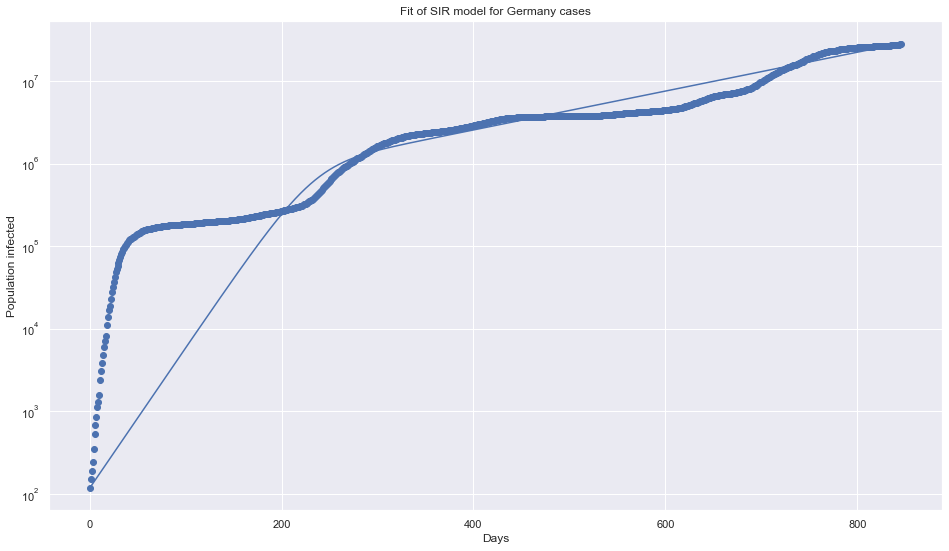

Optimal parameters: beta =  0.033745812054816374 and gamma =  -0.005420364370706291
Basic Reproduction Number R0:  -6.225746047109225


In [32]:
plt.semilogy(t_Germany, ydata_Germany, 'o',color='b')
plt.semilogy(t_Germany, fitted_Germany, color='b')
plt.title('Fit of SIR model for Germany cases')
plt.ylabel('Population infected')
plt.xlabel('Days')
plt.show()
print('Optimal parameters: beta = ', popt_Germany[0], 'and gamma = ', popt_Germany[1])
print('Basic Reproduction Number R0: ',popt_Germany[0]/popt_Germany[1] )

### Fitting the parameters of SIR model for India

In [33]:
ydata_India = np.array(df_processed.India_infected[70:])
#ydata_India = ydata_India.astype(int)
t_India=np.arange(len(ydata_India))

In [34]:
# Parameters

#N0 = country_population_list[1] # Population size
N0 = 10000000
beta = 0.4
gamma = 0.1  # 1(gamma) Person can infect 4(beta) people

I0 = ydata_India[0]   # Initial infected size
#S0 = N0-I0  # Population prone to infection
S0 = N0-I0
R0 = 0  # Initial recovered size

In [35]:
I0

62.0

In [36]:
def fit_odeint(x, beta, gamma):
    return integrate.odeint(SIR_model, (S0, I0, R0), t_India, args=(beta, gamma))[:,1] # we only would like to get dI

In [37]:
popt=[0.4, 0.1]
fit_odeint(t_India, *popt)

array([ 6.20000000e+01,  8.36909927e+01,  1.12970529e+02,  1.52493319e+02,
        2.05842667e+02,  2.77855210e+02,  3.75059131e+02,  5.06265482e+02,
        6.83365969e+02,  9.22409133e+02,  1.24505170e+03,  1.68051525e+03,
        2.26822311e+03,  3.06135157e+03,  4.13160906e+03,  5.57566055e+03,
        7.52375121e+03,  1.01512590e+04,  1.36941292e+04,  1.84694196e+04,
        2.49025088e+04,  3.35628804e+04,  4.52107260e+04,  6.08568159e+04,
        8.18379145e+04,  1.09909067e+05,  1.47351614e+05,  1.97090652e+05,
        2.62806171e+05,  3.49006249e+05,  4.61006982e+05,  6.04733440e+05,
        7.86227290e+05,  1.01074152e+06,  1.28135955e+06,  1.59724008e+06,
        1.95186997e+06,  2.33201236e+06,  2.71813542e+06,  3.08674822e+06,
        3.41425844e+06,  3.68114312e+06,  3.87499284e+06,  3.99155517e+06,
        4.03384409e+06,  4.01006944e+06,  3.93128327e+06,  3.80937718e+06,
        3.65569506e+06,  3.48025115e+06,  3.29141256e+06,  3.09588192e+06,
        2.89884419e+06,  

In [38]:
popt_India, pcov_India = optimize.curve_fit(fit_odeint, t_India, ydata_India)
perr_India = np.sqrt(np.diag(pcov_India))

C:\Users\kittu\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
<ipython-input-26-3cfdf291b9c0>:14: RuntimeWarning: overflow encountered in double_scalars
  dS_dt = -beta*S*I/N0
<ipython-input-26-3cfdf291b9c0>:15: RuntimeWarning: overflow encountered in double_scalars
  dI_dt = beta*S*I/N0-gamma*I
<ipython-input-26-3cfdf291b9c0>:16: RuntimeWarning: overflow encountered in double_scalars
  dR_dt = gamma*I
C:\Users\kittu\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


In [39]:
print('standard deviation error: ', str(perr_India), 'start infect:', ydata_India[0])
print('Optimal parameters: beta = ', popt_India[0], 'and gamma = ', popt_India[1])

standard deviation error:  [1.44639935e-03 2.01151881e-05] start infect: 62.0
Optimal parameters: beta =  0.06772411752227259 and gamma =  -0.0025308488986080747


In [40]:
fitted_India = fit_odeint(t_India, *popt_India)

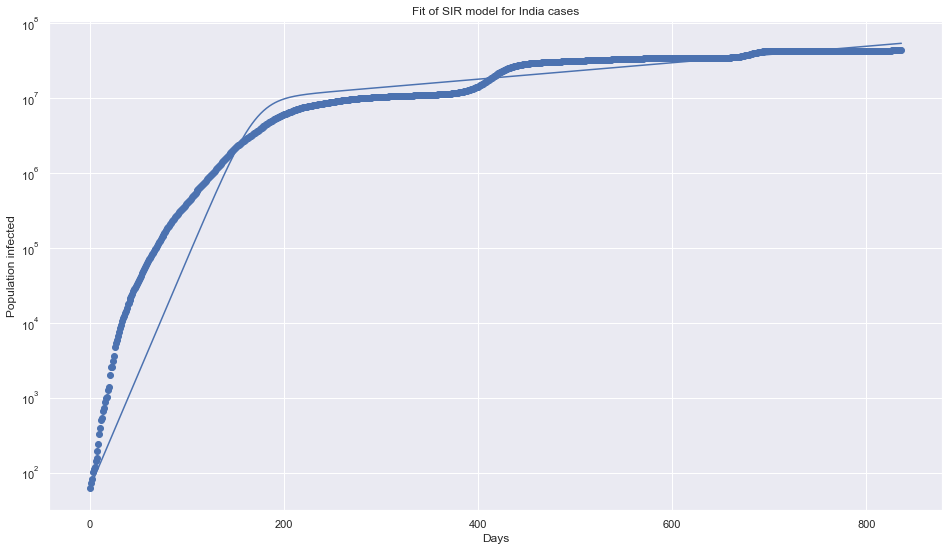

Optimal parameters: beta =  0.06772411752227259 and gamma =  -0.0025308488986080747
Basic Reproduction Number R0:  -26.759447219278773


In [41]:
plt.semilogy(t_India, ydata_India, 'o',color='b')
plt.semilogy(t_India, fitted_India, color='b')
plt.title('Fit of SIR model for India cases')
plt.ylabel('Population infected')
plt.xlabel('Days')
plt.show()
print('Optimal parameters: beta = ', popt_India[0], 'and gamma = ', popt_India[1])
print('Basic Reproduction Number R0: ',popt_India[0]/popt_India[1] )

### Fitting the parameters of SIR model for Spain

In [42]:
ydata_Spain = np.array(df_processed.Spain_infected[60:])
t_Spain=np.arange(len(ydata_Spain))

In [43]:
# Parameters

#N0 = country_population_list[1] # Population size
N0 = 1000000
beta = 0.4
gamma = 0.1  # 1(gamma) Person can infect 4(beta) people

I0 = ydata_Spain[0]   # Initial infected size
#S0 = N0-I0  # Population prone to infection
S0 = N0-I0
R0 = 0  # Initial recovered size

In [44]:
I0

84.0

In [45]:
def fit_odeint(x, beta, gamma):
    return integrate.odeint(SIR_model, (S0, I0, R0), t_Spain, args=(beta, gamma))[:,1] # we only would like to get dI

In [46]:
popt=[0.4, 0.1]
fit_odeint(t_Spain, *popt)

array([ 8.40000000e+01,  1.13383486e+02,  1.53042619e+02,  2.06568578e+02,
        2.78805714e+02,  3.76287308e+02,  5.07821566e+02,  6.85278620e+02,
        9.24645570e+02,  1.24743737e+03,  1.68257731e+03,  2.26889178e+03,
        3.05839934e+03,  4.12060889e+03,  5.54806800e+03,  7.46340059e+03,
        1.00280082e+04,  1.34524200e+04,  1.80078611e+04,  2.40378155e+04,
        3.19669957e+04,  4.23030097e+04,  5.56231394e+04,  7.25355687e+04,
        9.36028098e+04,  1.19218330e+05,  1.49440062e+05,  1.83809318e+05,
        2.21215257e+05,  2.59884352e+05,  2.97554398e+05,  3.31822770e+05,
        3.60569855e+05,  3.82311938e+05,  3.96371532e+05,  4.02842582e+05,
        4.02410066e+05,  3.96114894e+05,  3.85138187e+05,  3.70642503e+05,
        3.53675978e+05,  3.35127918e+05,  3.15719378e+05,  2.96013953e+05,
        2.76438074e+05,  2.57304132e+05,  2.38832734e+05,  2.21172377e+05,
        2.04415987e+05,  1.88614386e+05,  1.73786999e+05,  1.59930261e+05,
        1.47024112e+05,  

In [47]:
popt_Spain, pcov_Spain = optimize.curve_fit(fit_odeint, t_Spain, ydata_Spain)
perr_Spain = np.sqrt(np.diag(pcov_Spain))

C:\Users\kittu\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
<ipython-input-26-3cfdf291b9c0>:14: RuntimeWarning: overflow encountered in double_scalars
  dS_dt = -beta*S*I/N0
<ipython-input-26-3cfdf291b9c0>:15: RuntimeWarning: overflow encountered in double_scalars
  dI_dt = beta*S*I/N0-gamma*I
C:\Users\kittu\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


In [48]:
print('standard deviation error: ', str(perr_Spain), 'start infect:', ydata_Spain[0])
print('Optimal parameters: beta = ', popt_Spain[0], 'and gamma = ', popt_Spain[1])

standard deviation error:  [1.99163796e-03 2.65322547e-05] start infect: 84.0
Optimal parameters: beta =  0.06292317164468945 and gamma =  -0.003784970335747199


In [49]:
fitted_Spain = fit_odeint(t_Spain, *popt_Spain)

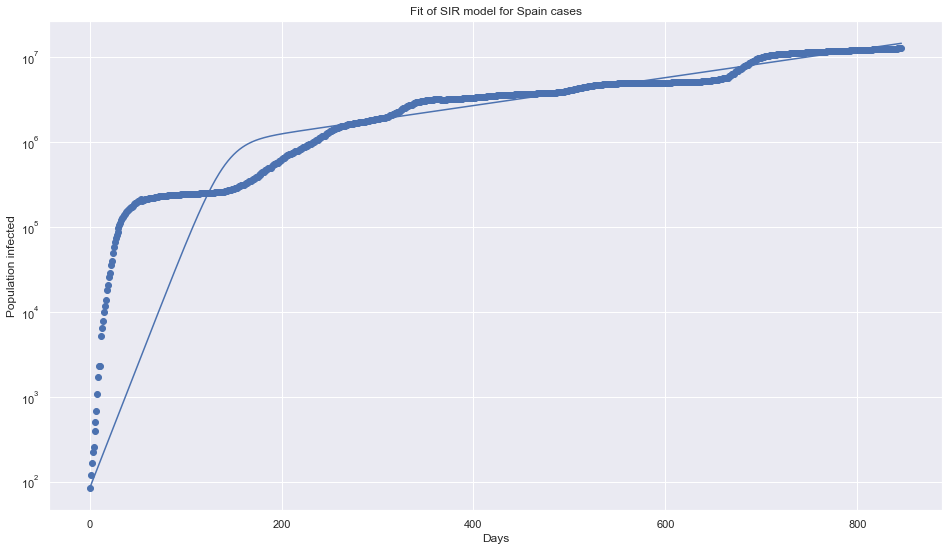

Optimal parameters: beta =  0.06292317164468945 and gamma =  -0.003784970335747199
Basic Reproduction Number R0:  -16.624482112953643


In [50]:
plt.semilogy(t_Spain, ydata_Spain, 'o',color='b')
plt.semilogy(t_Spain, fitted_Spain, color='b')
plt.title('Fit of SIR model for Spain cases')
plt.ylabel('Population infected')
plt.xlabel('Days')
plt.show()
print('Optimal parameters: beta = ', popt_Spain[0], 'and gamma = ', popt_Spain[1])
print('Basic Reproduction Number R0: ',popt_Spain[0]/popt_Spain[1] )

# Combined SIR-DataFrame

In [51]:
SIR=pd.DataFrame(t_Germany)

In [52]:
SIR.rename(columns={0:'date'}, inplace=True)

In [53]:
SIR['Germany_infected'], SIR['Germany_infected_fitted'] =pd.DataFrame(ydata_Germany), pd.DataFrame(fitted_Germany)

In [54]:
SIR.head()

,date,Germany_infected,Germany_infected_fitted
0,0,117,117.000000
1,1,150,121.672876
2,2,188,126.532364
3,3,240,131.585917
4,4,349,136.841281


In [55]:
SIR['India_infected'], SIR['India_infected_fitted'] =pd.DataFrame(ydata_India), pd.DataFrame(fitted_India)


In [56]:
SIR.tail()

,date,Germany_infected,Germany_infected_fitted,India_infected,India_infected_fitted
842,842,27454225,2.806961e+07,NaN,NaN
843,843,27573585,2.822217e+07,NaN,NaN
844,844,27681775,2.837556e+07,NaN,NaN
845,845,27771111,2.852979e+07,NaN,NaN
846,846,27771112,2.868485e+07,NaN,NaN


In [57]:
SIR['Spain_infected'], SIR['Spain_infected_fitted'] =pd.DataFrame(ydata_Spain), pd.DataFrame(fitted_Spain)

In [58]:
SIR.head()

,date,Germany_infected,Germany_infected_fitted,India_infected,India_infected_fitted,Spain_infected,Spain_infected_fitted
0,0,117,117.000000,62.0,62.000000,84.0,84.000000
1,1,150,121.672876,73.0,66.512434,120.0,89.794119
2,2,188,126.532364,82.0,71.353287,165.0,95.987869
3,3,240,131.585917,102.0,76.546461,222.0,102.608807
4,4,349,136.841281,113.0,82.117596,259.0,109.686392


# Dashboard creation

In [59]:
# country drop-down list
option_list = []
for each in country_list:
    option = {'label':each, 'value':each+'_infected'}
    option_list.append(option)

In [60]:
option_list

[{'label': 'India', 'value': 'India_infected'},
 {'label': 'Germany', 'value': 'Germany_infected'},
 {'label': 'Spain', 'value': 'Spain_infected'}]

In [61]:
import dash
import dash_core_components as dcc
import dash_html_components as html

fig = go.Figure()
app = dash.Dash()

app.layout = html.Div([
    html.Label(children='STATISTICS OF COVID-19'),
    dcc.Dropdown(id='country_drop_down', options=option_list, multi=False, value=option_list[0]['value'], placeholder='Filter by COUNTRY...'),
    dcc.Graph(figure=fig, id='main_window_slope') # Output
])

<ipython-input-61-a57e689f3421>:2: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
<ipython-input-61-a57e689f3421>:3: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


In [62]:
from dash.dependencies import Input, Output

@app.callback(
    Output('main_window_slope', 'figure'),
    [Input('country_drop_down', 'value')])
def update_function(country_drop_down):
    
    traces = []
    
    #if country_drop_down == 'Germany_infected':
    traces.append(dict(x=SIR.index,
                       y=SIR[country_drop_down],
                         mode='markers',
                         opacity=0.9,
                         line_width=2,
                         marker_size=4,
                         name=country_drop_down))
    traces.append(dict(x=SIR.index,
                       y=SIR[country_drop_down+str('_fitted')],
                         mode='lines',
                         opacity=0.9,
                         line_width=2,
                         marker_size=4,
                         name=country_drop_down+str('_fitted')))
    # Object rendering will be returned to layout
    
    
   

    
    return {
            'data': traces,
            'layout': dict(
                width=1280,
                height=720,
                xaxis_title="Time",
                yaxis_title="Infected_population",
                xaxis={'tickangle':-45,
                       'nticks':20,
                       'tickfont':dict(size=14, color="#7f7f7f"),
                      },
                yaxis={'type':"linear",
                       'range':'[1.1,5.5]'}
            )}

In [63]:
app.run_server(debug=True, use_reloader=False)

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


# SIR Model

In [64]:
data_raw = pd.read_csv('../data/raw/owid-covid-data.csv')

In [65]:
country_list = data_raw['location'].unique()

In [66]:
data_analysis = pd.read_csv('../data/processed/processed_data.csv')
data_analysis.set_index(['date'], inplace=True)
data_analysis.head()

,Afghanistan_infected,Afghanistan_Relativecases,Afghanistan_vaccinationRate,Africa_infected,Africa_Relativecases,Africa_vaccinationRate,Albania_infected,Albania_Relativecases,Albania_vaccinationRate,Algeria_infected,...,World_vaccinationRate,Yemen_infected,Yemen_Relativecases,Yemen_vaccinationRate,Zambia_infected,Zambia_Relativecases,Zambia_vaccinationRate,Zimbabwe_infected,Zimbabwe_Relativecases,Zimbabwe_vaccinationRate
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
data_infected= pd.DataFrame(data_analysis.index)
data_infected.set_index(['date'], inplace=True)

In [68]:
for each in country_list:
    data_infected[each] = pd.DataFrame(data_analysis[each+str('_infected')])

In [69]:
data_infected.tail()

,Afghanistan,Africa,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,Vanuatu,Vatican,Venezuela,Vietnam,Wallis and Futuna,Western Sahara,World,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2022-06-21,181808.0,11994315.0,277663.0,265993.0,43449.0,99761.0,3411.0,8581.0,9341492.0,423104.0,...,10989.0,29.0,525105.0,10738909.0,454.0,NaN,540568475.0,11824.0,324558.0,254919.0
2022-06-22,181912.0,12002174.0,277940.0,266006.0,43774.0,99761.0,3411.0,8590.0,9341492.0,423104.0,...,11026.0,29.0,525105.0,10739855.0,454.0,NaN,541372563.0,11824.0,324558.0,255049.0
2022-06-23,181987.0,12011490.0,278211.0,266015.0,43774.0,99761.0,3411.0,8590.0,9341492.0,423104.0,...,11033.0,29.0,525340.0,10740595.0,454.0,NaN,542126850.0,11824.0,324922.0,255136.0
2022-06-24,182033.0,12017973.0,278504.0,266025.0,43774.0,99761.0,3411.0,8625.0,9341492.0,423104.0,...,11044.0,29.0,525539.0,10742234.0,454.0,NaN,542917852.0,11824.0,325110.0,255309.0
2022-06-25,182072.0,12023592.0,278793.0,266030.0,43774.0,99761.0,3411.0,8625.0,9341492.0,423104.0,...,11044.0,29.0,525716.0,10742891.0,454.0,NaN,543323503.0,11824.0,325110.0,255309.0


In [70]:
# Parameters

N0 = 80000000 # Population size
beta = 0.4
gamma = 0.1  # 1(gamma) Person can infect 4(beta) people

I0 = data_infected.Germany[35]   # Initial infected size
S0 = N0-I0  # Population prone to infection
R0 = 0  # Initial recovered size

In [71]:
def SIR_model(SIR, beta, gamma):
    ''' Simple SIR model
        S: susceptible population
        I: infected people
        R: recovered people
        beta:
        
        overall condition is that the sum of changes (differences) sum up to 0
        dS+dI+dR=0
        S+I+R = N (constant size of population)
    '''
    
    S,I,R = SIR
    dS_dt = -beta*S*I/N0
    dI_dt = beta*S*I/N0-gamma*I
    dR_dt = gamma*I
    return ([dS_dt, dI_dt, dR_dt])

In [72]:
SIR = np.array([S0,I0,R0])
propagation_rates = pd.DataFrame(columns={'susceptible':S0, 'infected':I0, 'recovered':R0})

for each_t in np.arange(200):
#for each_t in np.arange(len(data_infected)):
    new_delta_vec = SIR_model(SIR, beta, gamma)
    SIR = SIR+new_delta_vec
    propagation_rates = propagation_rates.append({'susceptible':SIR[0], 'infected':SIR[1], 'recovered':SIR[2]}, ignore_index=True)
    

In [73]:
propagation_rates.tail()

,susceptible,infected,recovered
195,1.232012e+06,123.819559,7.876786e+07
196,1.232012e+06,112.200340,7.876788e+07
197,1.232011e+06,101.671466,7.876789e+07
198,1.232010e+06,92.130622,7.876790e+07
199,1.232010e+06,83.485089,7.876791e+07


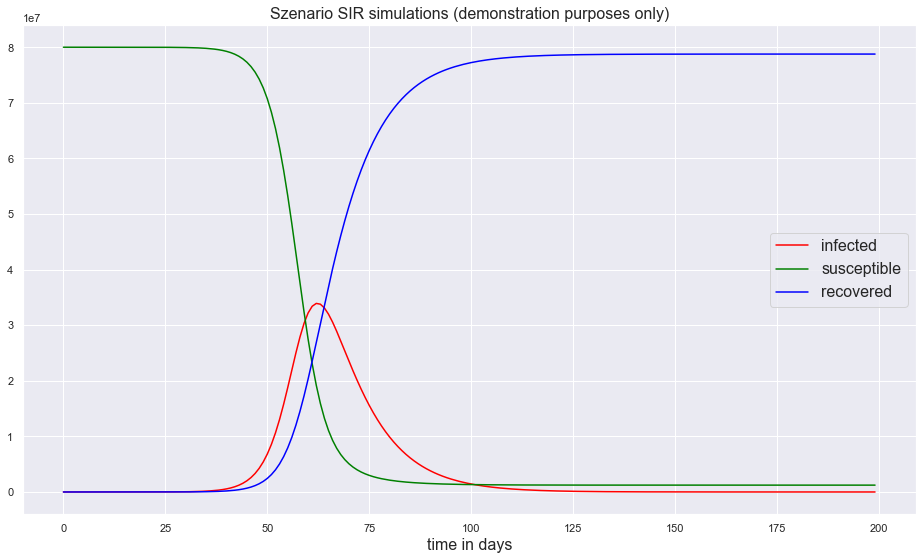

In [74]:
fig, ax1 = plt.subplots(1,1)

ax1.plot(propagation_rates.index, propagation_rates.infected, label = 'infected', color = 'red')
ax1.plot(propagation_rates.index, propagation_rates.susceptible, label = 'susceptible', color = 'green')
ax1.plot(propagation_rates.index, propagation_rates.recovered, label = 'recovered', color = 'blue')


ax1.set_yscale('linear')

ax1.set_title('Szenario SIR simulations (demonstration purposes only)', size = 16)
ax1.set_xlabel('time in days', size = 16)
ax1.legend(loc = 'best', prop={'size':16})